In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

np.set_printoptions(threshold=np.inf)
plt.style.use('ggplot')

## ReadDataset

In [2]:
arr = np.genfromtxt('tic-tac-toe.data', delimiter=',', dtype='<U1')

## Split train&test

In [3]:
X = arr[:, :9]
y = arr[:, 9]

X.shape, y.shape

((958, 9), (958,))

## Rotate

In [4]:
# X_rotate = []
# X_flip_rotate = []

# for i in range(4):
#     X_matrix = X.reshape(-1, 3, 3)
#     X_matrix_flip = np.fliplr(X_matrix)
#     for i in range(X_matrix.shape[0]):

#         x_rotate = np.rot90(X_matrix[i], i).reshape(-1, 9)
#         X_rotate.append(x_rotate)
        
#         x_flip_rotate = np.rot90(X_matrix_flip[i], i).reshape(-1, 9)
#         X_flip_rotate.append(x_flip_rotate)        
    
# a = np.array(X_rotate).reshape(-1, 9)
# b = np.array(X_flip_rotate).reshape(-1, 9)
# X = np.append(a, b, axis=0)

# y = np.tile(y, 8)

# X.shape, y.shape

## Remove Duplicate after rotate

In [5]:
X, index = np.unique(X, axis=0, return_index=True)
y = y[index]

X.shape, y.shape

((958, 9), (958,))

## LabelEncoder

In [6]:
feature = np.unique(X)
inx = np.arange(feature.shape[0])
search = np.searchsorted(feature, X)
X = inx[search]

uni = np.unique(y)
inx = np.arange(uni.shape[0])
search = np.searchsorted(uni, y)
y = inx[search].reshape(-1, 1)

X.shape, y.shape

((958, 9), (958, 1))

## OneHotEncoder

In [7]:
n_feature = feature.shape[0]
one_hot = np.zeros((X.shape[0], X.shape[1], n_feature))
for i, unique_value in enumerate(np.unique(X)):
    one_hot[:, :, i][X == unique_value] = 1

X = one_hot.reshape(-1, n_feature*X.shape[1])

X.shape, y.shape

((958, 27), (958, 1))

In [8]:
n_feature = 2
one_hot = np.zeros((y.shape[0], y.shape[1], n_feature))
for i, unique_value in enumerate(np.unique(y)):
    one_hot[:, :, i][y == unique_value] = 1

y = one_hot.reshape(-1, n_feature*y.shape[1])

y.shape

(958, 2)

## Shuffle

In [9]:
# random_state = 0

# np.random.seed(random_state)
# np.random.shuffle(X)

# np.random.seed(random_state)
# np.random.shuffle(y)

# X.shape, y.shape

## Split

In [10]:
train_size = 0.8
# sample = int(train_split*y.shape[0])

# X_train, X_test = X[:sample], X[sample:]
# y_train, y_test = y[:sample], y[sample:]

# X_train.shape, X_test.shape

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 -train_size, random_state=42, stratify=y)

## Model

In [12]:
def create_model(neurons=(32, 32), lr=0.1, decay=1e-6, momentum=0.8):
    model = Sequential()

    model.add(Dense(neurons[0], activation='relu', input_shape=(X_train.shape[1:])))
    model.add(Dense(neurons[1], activation='relu'))
    model.add(Dense(2, activation='sigmoid'))

    optimizer = SGD(lr=lr, decay=decay, momentum=momentum, nesterov=True)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [13]:
model = create_model()
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 2,018
Trainable params: 2,018
Non-trainable params: 0
_________________________________________________________________


## Train

In [14]:
batch_size = 8
epochs = 60

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

Train on 766 samples, validate on 192 samples
Epoch 1/60
766/766 [==============================] - 0s 246us/sample - loss: 0.5781 - acc: 0.7037 - val_loss: 0.5108 - val_acc: 0.7031
Epoch 2/60
766/766 [==============================] - 0s 120us/sample - loss: 0.3959 - acc: 0.8022 - val_loss: 0.4022 - val_acc: 0.7891
Epoch 3/60
766/766 [==============================] - 0s 113us/sample - loss: 0.2390 - acc: 0.9080 - val_loss: 0.2229 - val_acc: 0.9167
Epoch 4/60
766/766 [==============================] - 0s 112us/sample - loss: 0.1482 - acc: 0.9556 - val_loss: 0.0531 - val_acc: 0.9818
Epoch 5/60
766/766 [==============================] - 0s 117us/sample - loss: 0.0887 - acc: 0.9693 - val_loss: 0.3410 - val_acc: 0.8932
Epoch 6/60
766/766 [==============================] - 0s 110us/sample - loss: 0.0632 - acc: 0.9791 - val_loss: 0.0624 - val_acc: 0.9714
Epoch 7/60
766/766 [==============================] - 0s 118us/sample - loss: 0.0641 - acc: 0.9798 - val_loss: 0.0355 - val_acc: 0.9896
Ep

## Training accuracy and Training Loss Graph 

Text(0, 0.5, 'Training loss')

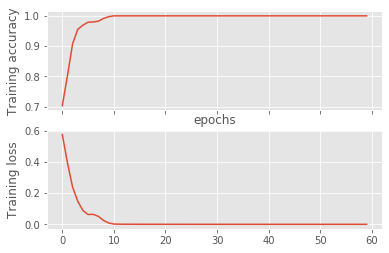

In [15]:
fig, ax = plt.subplots(2, sharex=True)

ax[0].plot(history.history['acc'], label=model)
ax[1].plot(history.history['loss'], label=model)
 
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('Training accuracy')
ax[1].set_ylabel('Training loss')

## Evaluate

In [16]:
score = model.evaluate(X_test, y_test)

192/192 [==============================] - 0s 16us/sample - loss: 0.0063 - acc: 1.0000


## Confusion Matrix

In [17]:
y_test_argmax = y_test.argmax(axis=1)
y_pred = model.predict_classes(X_test)
confusion_matrix(y_test_argmax, y_pred)

array([[ 67,   0],
       [  0, 125]])

In [18]:
[y_test_argmax != y_pred]

# X_fail.reshape(-1, 3, 3)
# X_fail

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
      

## Receiver Operating Characteristic

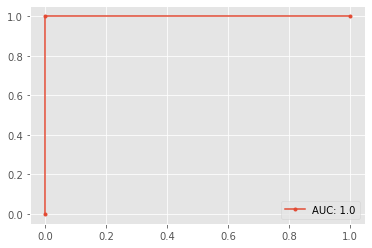

In [19]:
fpr, tpr, _ = roc_curve(y_test_argmax,  y_pred)
auc = roc_auc_score(y_test_argmax, y_pred)

plt.plot(fpr, tpr, marker='.', label=f'AUC: {auc}')
plt.legend()

## GridSearch

In [20]:
param_grid = {
    'neurons' : [(16, 16), (32, 32)],
    'lr' : [0.01, 0.1],
    'momentum' : [0.8, 0.9],
    'batch_size' : [8, 16],
    'epochs' : [40, 60],
}

In [21]:
model = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size, verbose=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print('best score: ', grid_result.best_score_, grid_result.best_params_)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'{mean} ({stdev}) with: {param}')

best score:  0.9869365930557251 {'batch_size': 8, 'epochs': 40, 'lr': 0.1, 'momentum': 0.9, 'neurons': (32, 32)}
0.9797555327415466 (0.005252152472709251) with: {'batch_size': 8, 'epochs': 40, 'lr': 0.01, 'momentum': 0.8, 'neurons': (16, 16)}
0.9692980170249939 (0.016758107824769747) with: {'batch_size': 8, 'epochs': 40, 'lr': 0.01, 'momentum': 0.8, 'neurons': (32, 32)}
0.9764960527420044 (0.009792445286038898) with: {'batch_size': 8, 'epochs': 40, 'lr': 0.01, 'momentum': 0.9, 'neurons': (16, 16)}
0.9758339643478393 (0.010059532990866883) with: {'batch_size': 8, 'epochs': 40, 'lr': 0.01, 'momentum': 0.9, 'neurons': (32, 32)}
0.9719293713569641 (0.006414641855455714) with: {'batch_size': 8, 'epochs': 40, 'lr': 0.1, 'momentum': 0.8, 'neurons': (16, 16)}
0.984975802898407 (0.008172248451824037) with: {'batch_size': 8, 'epochs': 40, 'lr': 0.1, 'momentum': 0.8, 'neurons': (32, 32)}
0.9738646984100342 (0.02773568229747696) with: {'batch_size': 8, 'epochs': 40, 'lr': 0.1, 'momentum': 0.9, 'ne

## Average test accuracy rate in 10 times

In [22]:
scores = []
for i in range(12):
    model = create_model()
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0)
    print(f'Train - loss: {history.history["loss"][-1]} - acc: {history.history["acc"][-1]}')

    score = model.evaluate(X_test, y_test)
    scores.append(score[1])

scores = np.array(scores)

'Max accuracy rate :', scores.max(), 'Avg accuracy rate :', np.average(scores), 'Min accuracy rate :', scores.min()

Train - loss: 7.64186740169869e-05 - acc: 1.0
192/192 [==============================] - 0s 122us/sample - loss: 0.0210 - acc: 0.9948
Train - loss: 4.4702870752941065e-05 - acc: 1.0
192/192 [==============================] - 0s 123us/sample - loss: 0.0173 - acc: 0.9948
Train - loss: 4.838183896552253e-05 - acc: 1.0
192/192 [==============================] - 0s 136us/sample - loss: 0.0076 - acc: 0.9948
Train - loss: 5.845538421743656e-05 - acc: 1.0
192/192 [==============================] - 0s 150us/sample - loss: 0.0345 - acc: 0.9896
Train - loss: 7.092060060306987e-05 - acc: 1.0
192/192 [==============================] - 0s 163us/sample - loss: 0.0255 - acc: 0.9896
Train - loss: 3.4757463496758375e-05 - acc: 1.0
192/192 [==============================] - 0s 193us/sample - loss: 0.0109 - acc: 0.9948
Train - loss: 5.369429212197266e-05 - acc: 1.0
192/192 [==============================] - 0s 205us/sample - loss: 0.0042 - acc: 1.0000
Train - loss: 7.289772931082261e-05 - acc: 1.0
192/192

('Max accuracy rate :',
 1.0,
 'Avg accuracy rate :',
 0.99370664,
 'Min accuracy rate :',
 0.9895833)

## Save Weight

In [23]:
model.to_json()

'{"class_name": "Sequential", "config": {"name": "sequential_13", "layers": [{"class_name": "Dense", "config": {"name": "dense_39", "trainable": true, "batch_input_shape": [null, 27], "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null, "dtype": "float32"}}, "bias_initializer": {"class_name": "Zeros", "config": {"dtype": "float32"}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_40", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null, "dtype": "float32"}}, "bias_initializer": {"class_name": "Zeros", "config": {"dtype": "float32"}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint